In [1]:
import json

In [2]:
with open ("db2.json", "r", encoding="utf-8-sig") as db_file:
    db = json.load(db_file)

In [3]:
len(db)

4043

In [16]:
for el in db:
    if db[el]["Coffin Text Spell Number"] == "1135":
        print(db[el])
        break

{'Name': 'Guardians of his limbs,jr(y).w a.wt=f', 'Appearance Pose': 'Not specified', 'Head': 'Not specified', 'Upper Torso': 'Not specified', 'Lower Torso': 'Not specified', 'Image': '', 'Book of the Dead Chapter Number': '', 'Coffin Text Spell Number': '1135', 'Description': '', 'Costume': 'Not specified', 'Headgear': 'Not specified', 'Holding': 'Not specified', 'Pose': 'Not specified', 'Gesture': 'Not specified', 'related object': '9', 'related object type': 'Coffin'}


In [4]:
poses = set()
gestures = set()
head = set()
uppert = set()
lowert = set()
costume = set()
headgear = set()
holding = set()
pose = set()
for el in db:
    poses.add(db[el]["Appearance Pose"])
    gestures.add(db[el]["Gesture"])
    head.add(db[el]["Head"])
    uppert.add(db[el]["Upper Torso"])
    lowert.add(db[el]["Lower Torso"])
    costume.add(db[el]["Costume"])
    headgear.add(db[el]["Headgear"])
    holding.add(db[el]["Holding"])
    pose.add(db[el]["Pose"])

In [5]:
len(holding)

141

# Appearance pose and Pose is the same thing

In [6]:
len(gestures)

68

In [4]:
#IMPORTANT TO RUN
dbcorrect = dict()
for el in db:
    dbcorrect[el] = dict()
    for cat in db[el]:
        dbcorrect[el][cat] = db[el][cat].split("\n")

In [8]:
poses_c = set()
gestures_c = set()
head_c = set()
uppert_c = set()
lowert_c = set()
costume_c = set()
headgear_c = set()
holding_c = set()
pose_c = set()
names = set()
book_dead = set()
spell_coffin = set()
for el in dbcorrect:
    for p1 in dbcorrect[el]["Appearance Pose"]:
        poses_c.add(p1)
    for g1 in dbcorrect[el]["Gesture"]:
        gestures_c.add(g1)
    for h1 in dbcorrect[el]["Head"]:
        head_c.add(h1)
    for ut1 in dbcorrect[el]["Upper Torso"]:
        uppert_c.add(ut1)
    for lt1 in dbcorrect[el]["Lower Torso"]:
        lowert_c.add(lt1)
    for c1 in dbcorrect[el]["Costume"]:
        costume_c.add(c1)
    for hg1 in dbcorrect[el]["Headgear"]:
        headgear_c.add(hg1)
    for ho1 in dbcorrect[el]["Holding"]:
        holding_c.add(ho1)
    for p2 in dbcorrect[el]["Pose"]:
        pose_c.add(p2)
    for n1 in dbcorrect[el]["Name"]:
        names.add(n1)
    for bd1 in dbcorrect[el]["Book of the Dead Chapter Number"]:
        book_dead.add(bd1)
    for spell1 in dbcorrect[el]["Coffin Text Spell Number"]:
        spell_coffin.add(spell1)

In [9]:
taxo = dict()
for el in dbcorrect:
    for cat in dbcorrect[el]:
        if cat not in taxo:
            taxo[cat] = dict()
        for voice in dbcorrect[el][cat]:
            if " - " in voice:
                macromicro = voice.split(" - ")
                macro = macromicro[0].strip()
                micro = macromicro[1].strip()
                if macro not in taxo[cat]:
                    taxo[cat][macro] = set()
                taxo[cat][macro].add(micro)
taxo_num = dict()
for el in dbcorrect:
    for cat in dbcorrect[el]:
        if cat not in taxo_num:
            taxo_num[cat] = dict()
        for voice in dbcorrect[el][cat]:
            if " - " in voice:
                macromicro = voice.split(" - ")
                macro = macromicro[0].strip()
                micro = macromicro[1].strip()
                if macro not in taxo_num[cat]:
                    taxo_num[cat][macro] = dict()
                if micro not in taxo_num[cat][macro]:
                    taxo_num[cat][macro][micro] = {"n":0}
                taxo_num[cat][macro][micro]["n"] += 1
                if "n" not in taxo_num[cat][macro]:
                    taxo_num[cat][macro]["n"] = 0
                taxo_num[cat][macro]["n"] +=1
            else:
                if voice not in taxo_num[cat]:
                    taxo_num[cat][voice] = {"n":0}
                elif "n" not in taxo_num[cat][voice]:
                    taxo_num[cat][voice]["n"] = 0
                taxo_num[cat][voice]["n"] += 1

simpler_taxo = dict()
for el in dbcorrect:
    for cat in dbcorrect[el]:
        if cat not in simpler_taxo:
            simpler_taxo[cat] = dict()
        for voice in dbcorrect[el][cat]:
            if " - " in voice:
                macromicro = voice.split(" - ")
                macro = macromicro[0].strip()
                micro = macromicro[1].strip()
                if macro not in simpler_taxo[cat]:
                    simpler_taxo[cat][macro] = 0
                if micro not in simpler_taxo[cat]:
                    simpler_taxo[cat][micro] = 0
                simpler_taxo[cat][macro] +=1
                simpler_taxo[cat][micro] +=1
            else:
                if voice not in simpler_taxo[cat]:
                    simpler_taxo[cat][voice] = 0
                simpler_taxo[cat][voice] += 1

In [7]:
len(dbcorrect)

4033

In [35]:
for el in simpler_taxo:
    print(el)
    print(len(simpler_taxo[el]))
    total = 0
    for spec in simpler_taxo[el]:
        if spec != "" and spec != ",":
            total+= (simpler_taxo[el][spec])
    print(total)
    print("----------------------------")

Name
908
3283
----------------------------
Appearance Pose
48
5307
----------------------------
Head
68
5217
----------------------------
Upper Torso
67
5492
----------------------------
Lower Torso
70
5736
----------------------------
Image
369
1365
----------------------------
Book of the Dead Chapter Number
12
696
----------------------------
Coffin Text Spell Number
295
2805
----------------------------
Description
130
5375
----------------------------
Costume
28
5129
----------------------------
Headgear
37
4741
----------------------------
Holding
49
4954
----------------------------
Pose
48
5307
----------------------------
Gesture
23
4152
----------------------------
related object
195
4028
----------------------------


In [71]:
for el in dbcorrect:
    print(dbcorrect[el].keys())
    break

dict_keys(['Name', 'Appearance Pose', 'Head', 'Upper Torso', 'Lower Torso', 'Image', 'Book of the Dead Chapter Number', 'Coffin Text Spell Number', 'Description', 'Costume', 'Headgear', 'Holding', 'Pose', 'Gesture', 'related object'])


C:\Users\ra65faw\AppData\Local\Temp\ipykernel_8548\3852455196.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


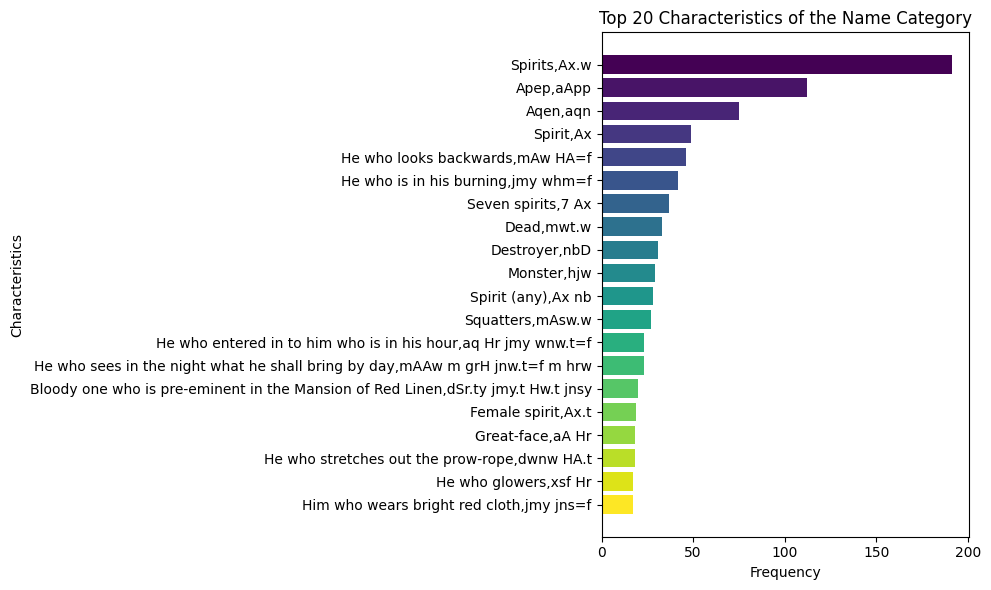

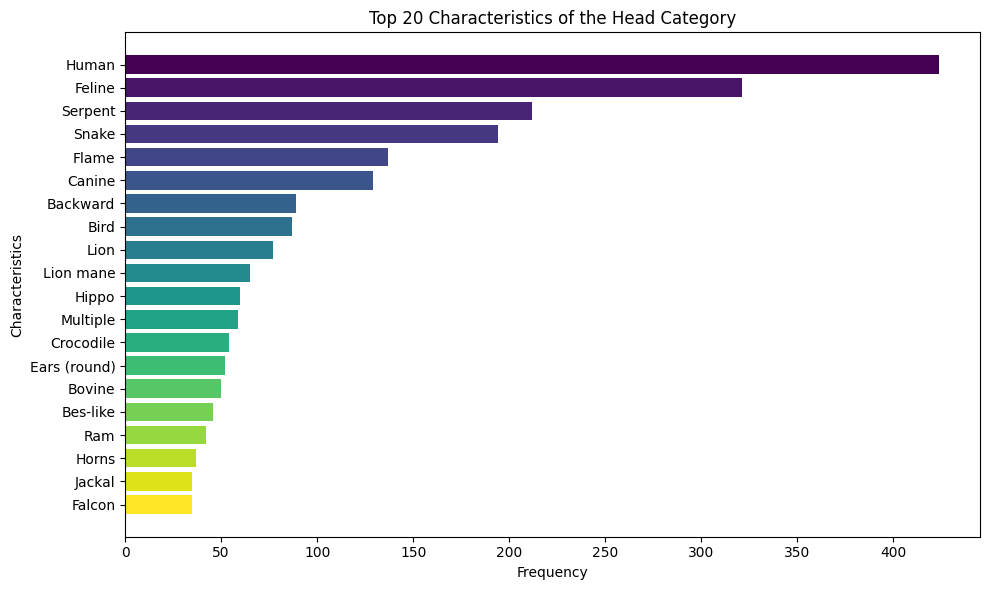

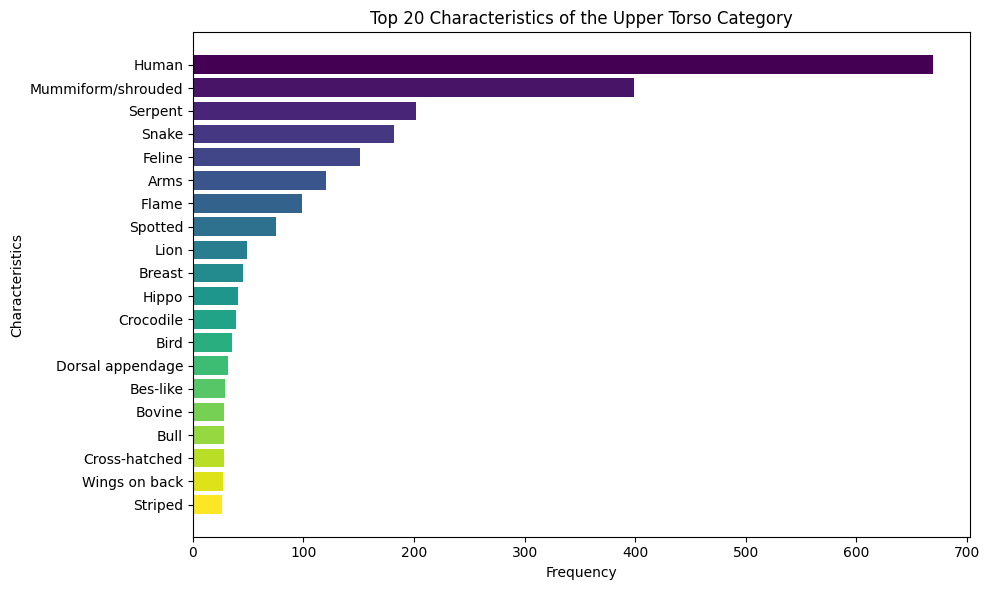

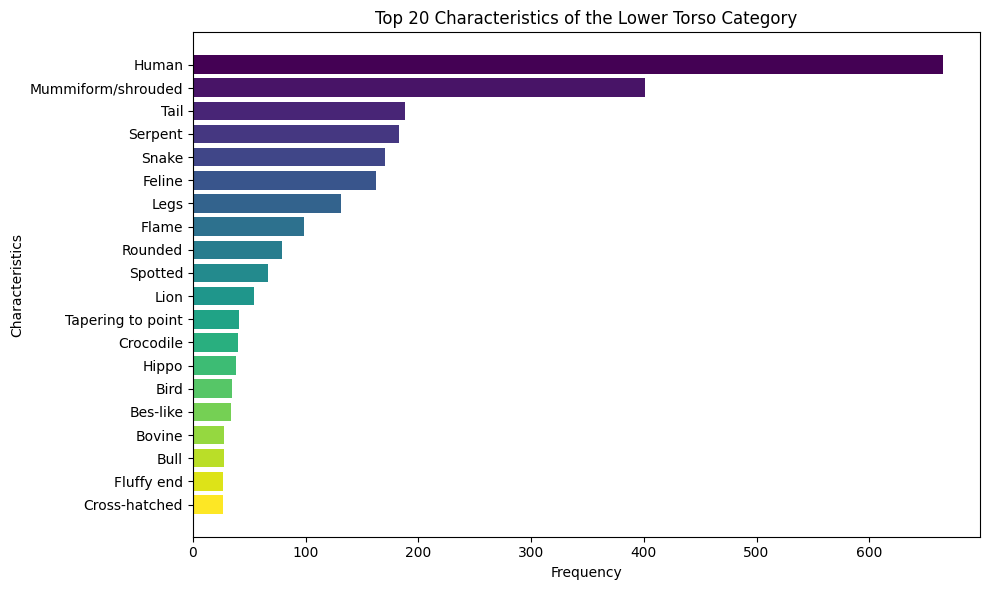

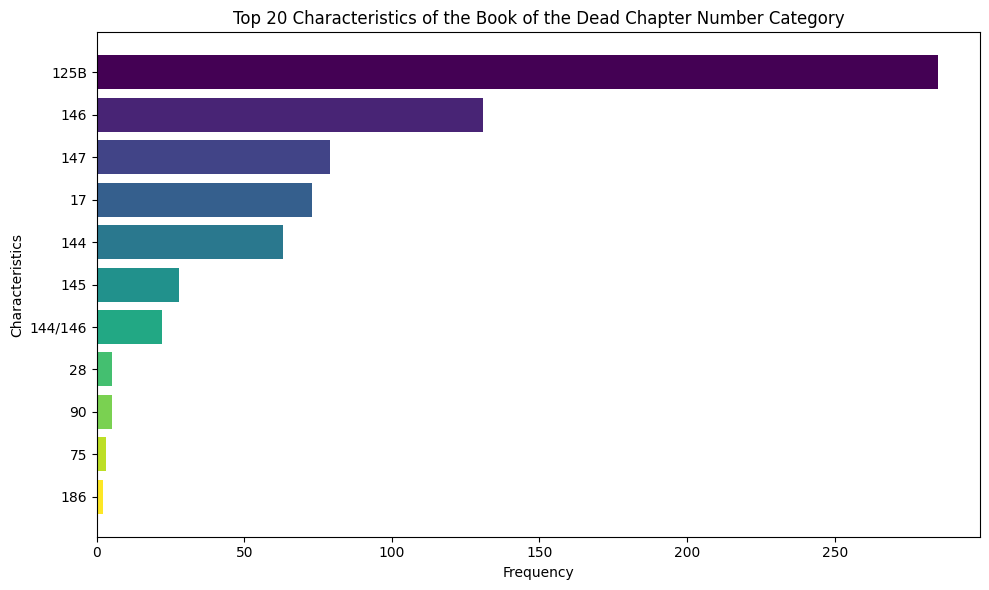

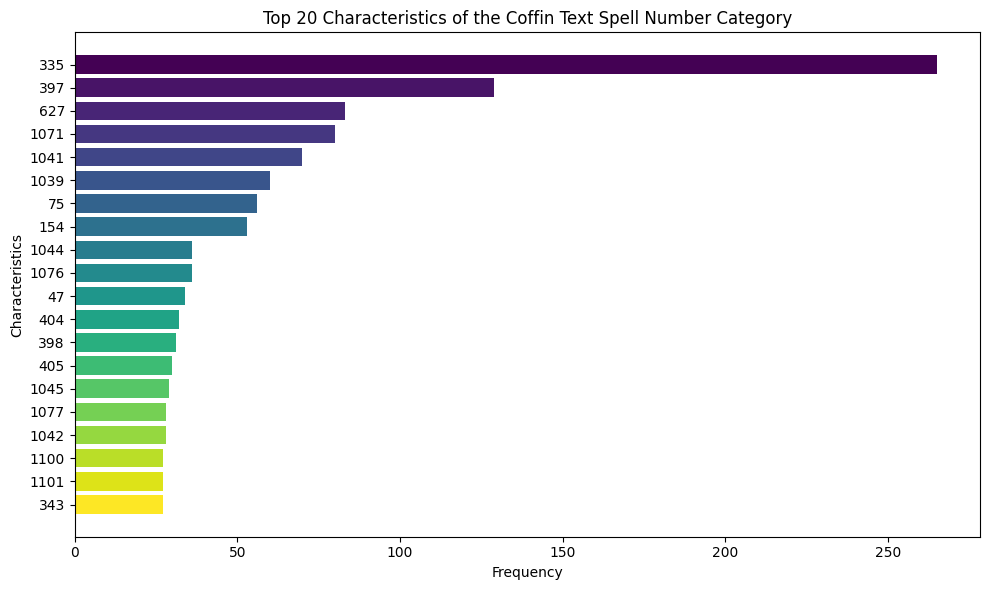

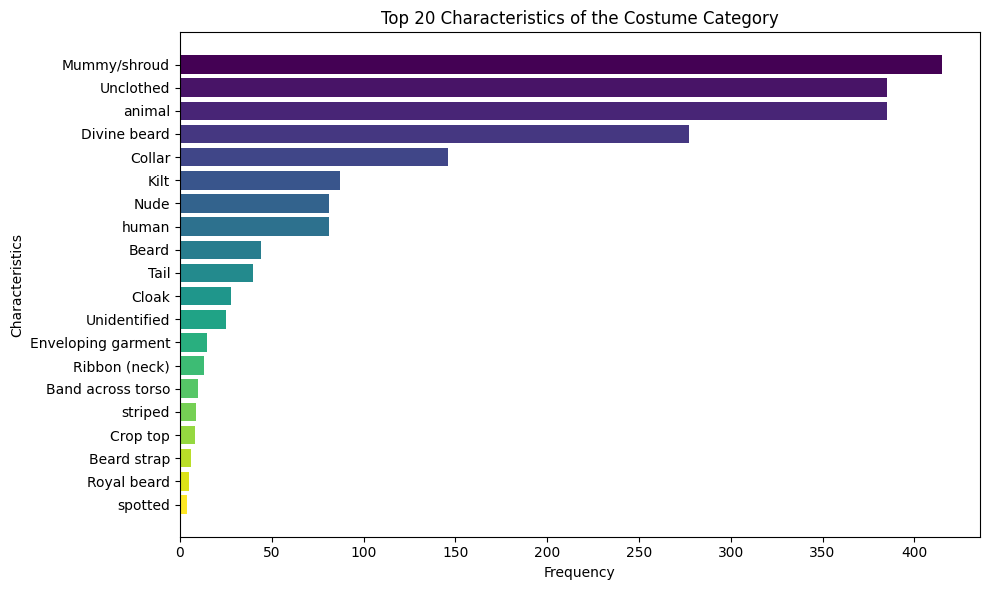

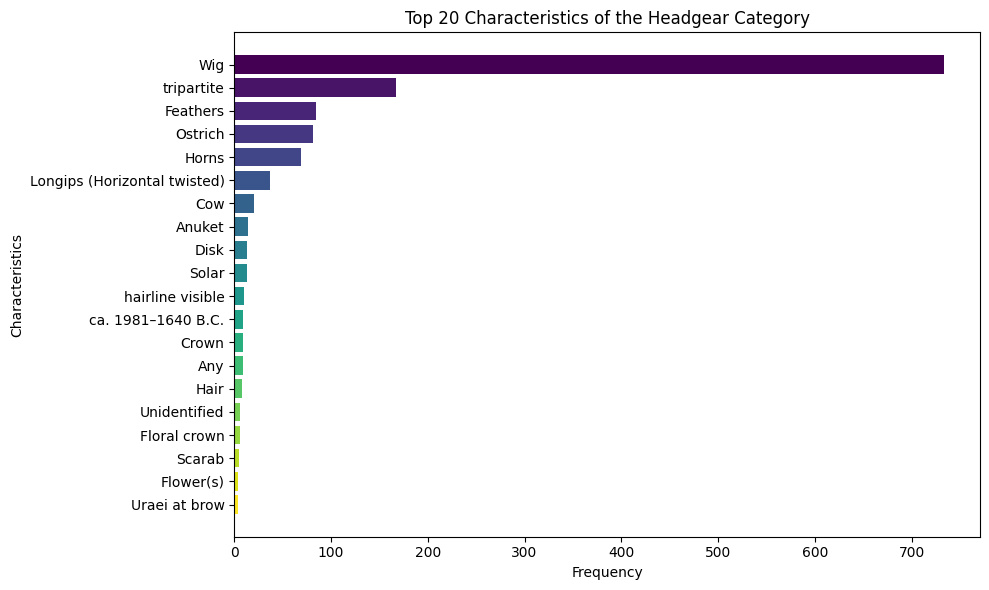

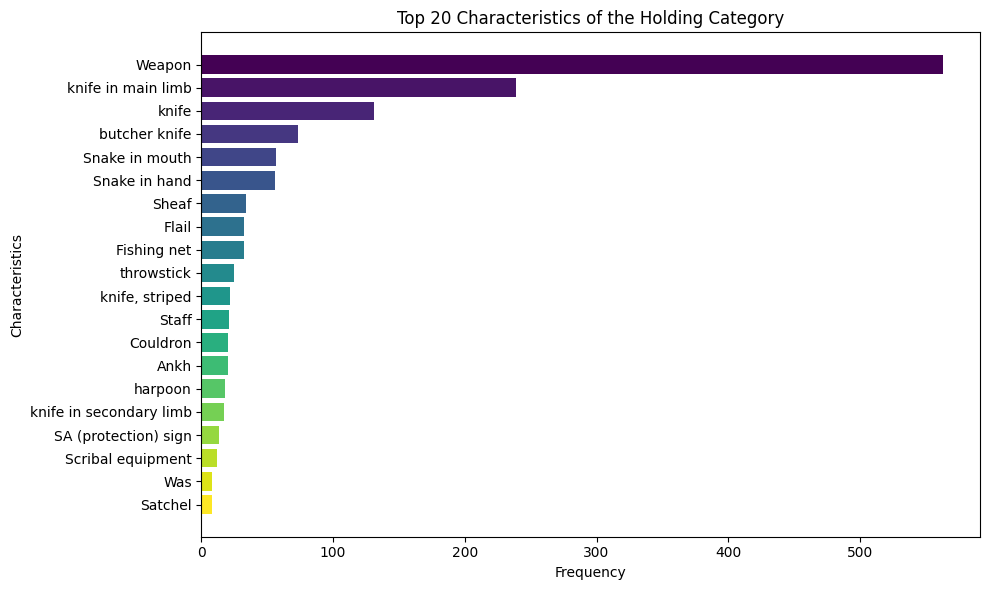

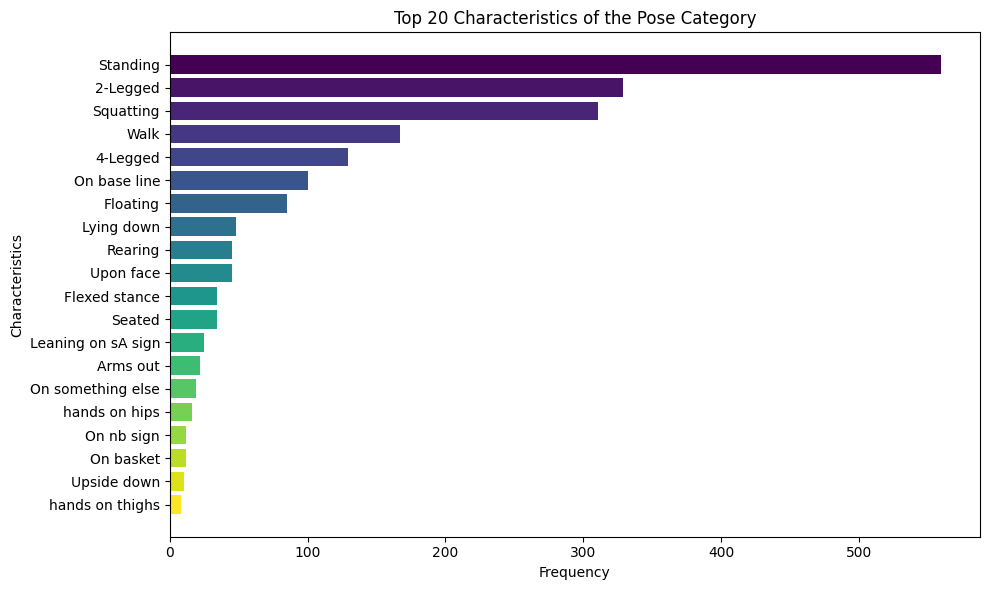

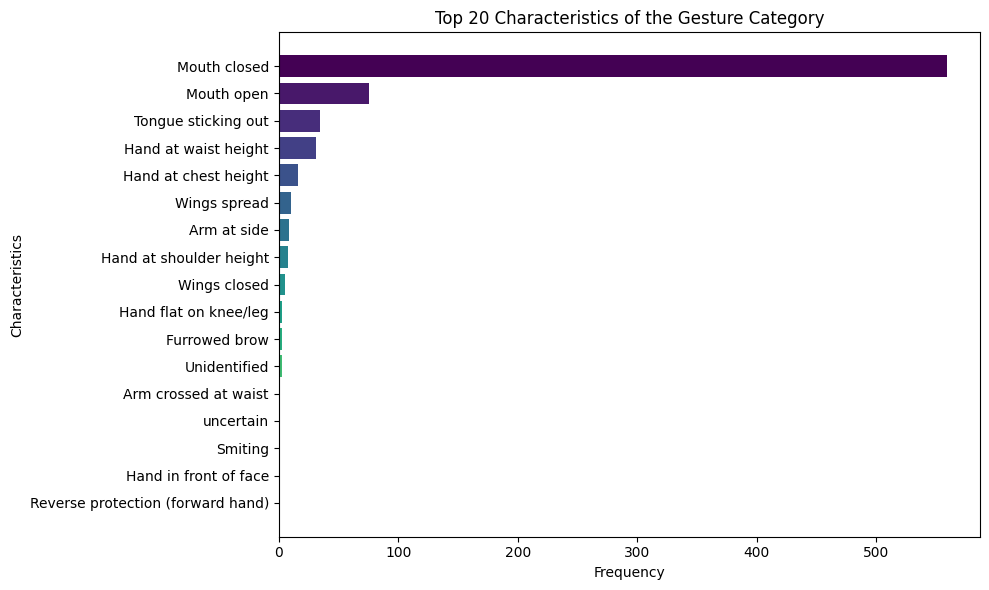

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.patches import Patch

excluded = ["Appearance Pose", "Image", "Description", "related object"]
for category in dbcorrect["8"].keys():
    if category not in excluded:
        # Sort the dictionary based on values and get the top 15 categories
        top_categories = sorted(simpler_taxo_corr[category].items(), key=lambda x: x[1], reverse=True)[:20]
        
        # Create a colormap
        # Extracting category names and values
        categories = [category[0] for category in top_categories]
        values = [category[1] for category in top_categories]
        
        # Create a colormap
        colormap = cm.get_cmap('viridis')
        
        # Create a colored bar chart with gradient
        plt.figure(figsize=(10, 6))
        bars = plt.barh(categories, values, color=colormap(np.linspace(0, 1, len(categories))))
        plt.xlabel('Frequency')
        plt.ylabel('Characteristics')
        plt.title('Top 20 Characteristics of the '+str(category)+' Category')
        
        plt.gca().invert_yaxis()  # Invert y-axis to have the highest category on top
        #plt.show()
        plt.tight_layout()
        plt.savefig(fname= 'graphs\\' + category.replace(" ", "_")+ ".png")

In [63]:
Uncertain_categories = ["Not specified", "None", "Uncertain", "Incomplete", "", "Other", ","]

In [69]:
simpler_taxo_corr = dict()
for el in dbcorrect:
    for cat in dbcorrect[el]:
        if cat not in simpler_taxo_corr:
            simpler_taxo_corr[cat] = dict()
        for voice in dbcorrect[el][cat]:
            if voice not in Uncertain_categories:
                if " - " in voice:
                    macromicro = voice.split(" - ")
                    macro = macromicro[0].strip()
                    micro = macromicro[1].strip()
                    if macro not in Uncertain_categories:
                        if macro not in simpler_taxo_corr[cat]:
                            simpler_taxo_corr[cat][macro] = 0
                        simpler_taxo_corr[cat][macro] +=1
                    if micro not in Uncertain_categories:
                        if micro not in simpler_taxo_corr[cat]:
                            simpler_taxo_corr[cat][micro] = 0
                        simpler_taxo_corr[cat][micro] +=1
                else:
                    voice = voice.strip()
                    if voice not in simpler_taxo_corr[cat]:
                        simpler_taxo_corr[cat][voice] = 0
                    simpler_taxo_corr[cat][voice] += 1

In [ ]:
taxo_num["Upper Torso"]

In [ ]:
taxo

In [29]:
for el in dbcorrect:
    print(dbcorrect[el].keys())
    break

dict_keys(['Name', 'Appearance Pose', 'Head', 'Upper Torso', 'Lower Torso', 'Image', 'Book of the Dead Chapter Number', 'Coffin Text Spell Number', 'Description', 'Costume', 'Headgear', 'Holding', 'Pose', 'Gesture', 'related object'])


In [24]:
complete_d = list()
for demon in dbcorrect:
    if "Not specified" not in dbcorrect[demon]["Head"] and "Not specified" not in dbcorrect[demon]["Upper Torso"] and "Not specified" not in dbcorrect[demon]["Lower Torso"]:
        complete_d.append(demon)

In [25]:
len(complete_d)

1352

In [29]:
diverse = list()
human = list()
non_human = list()

for demon in dbcorrect:
    if demon in complete_d:
        h = False
        animal = False
        if "Human" in dbcorrect[demon]["Head"] or "Human" in dbcorrect[demon]["Upper Torso"] or "Human" in dbcorrect[demon]["Lower Torso"]:
            h = True
        if "Human" not in dbcorrect[demon]["Head"] or "Human" not in dbcorrect[demon]["Upper Torso"] or "Human" not in dbcorrect[demon]["Lower Torso"]:
            animal = True
        if h is True and animal is True:
            diverse.append(demon)
        elif h is True and animal is False:
            human.append(demon)
        elif h is False and animal is True:
            non_human.append(demon)
        
            
            

In [27]:
len(diverse)

234

In [30]:
len(non_human)

729

In [31]:
len(human)

389

In [32]:
simpler_taxo_diverse = dict()
for el in dbcorrect:
    if el in diverse:
        for cat in dbcorrect[el]:
            if cat not in simpler_taxo_diverse:
                simpler_taxo_diverse[cat] = dict()
            for voice in dbcorrect[el][cat]:
                if " - " in voice:
                    macromicro = voice.split(" - ")
                    macro = macromicro[0].strip()
                    micro = macromicro[1].strip()
                    if macro not in simpler_taxo_diverse[cat]:
                        simpler_taxo_diverse[cat][macro] = 0
                    if micro not in simpler_taxo_diverse[cat]:
                        simpler_taxo_diverse[cat][micro] = 0
                    simpler_taxo_diverse[cat][macro] +=1
                    simpler_taxo_diverse[cat][micro] +=1
                else:
                    if voice not in simpler_taxo_diverse[cat]:
                        simpler_taxo_diverse[cat][voice] = 0
                    simpler_taxo_diverse[cat][voice] += 1

In [ ]:
simpler_taxo_diverse

In [37]:
print(dbcorrect[diverse[29]])

{'Name': [','], 'Appearance Pose': ['Arms out', 'Seated', 'On base line'], 'Head': ['Ram', 'Horns'], 'Upper Torso': ['Human'], 'Lower Torso': ['Human'], 'Image': [''], 'Book of the Dead Chapter Number': [''], 'Coffin Text Spell Number': [''], 'Description': [''], 'Costume': ['Nude - human'], 'Headgear': ['Wig'], 'Holding': ['Snake in hand', 'Snake in mouth'], 'Pose': ['Arms out', 'Seated', 'On base line'], 'Gesture': ['Hand at waist height'], 'related object': ['22']}


In [44]:
aspect = [(("Ram", "Horns"), ("Human"), ("Human"))]

In [45]:
aspect.append((("Ram", "Horns"), ("Human"), ("Human")))

In [61]:
triple_look = dict()
for d in dbcorrect:
    if d in diverse:
        head = tuple(dbcorrect[d]["Head"])
        ut = tuple(dbcorrect[d]["Upper Torso"])
        lt = tuple(dbcorrect[d]["Lower Torso"])
        look = (head,ut,lt)
        if look not in triple_look:
            triple_look[look] = 0
        triple_look[look] += 1
        

In [62]:
triple_look

{(('Bes-like',),
  ('Bes-like', 'Human'),
  ('Tail - Rounded', 'Bes-like', 'Human')): 1,
 (('Ram', 'Horns'), ('Human',), ('Human', 'Mummiform/shrouded')): 1,
 (('Bes-like',), ('Bes-like', 'Human', 'Ribs'), ('Bes-like', 'Human')): 1,
 (('Bes-like',), ('Bes-like', 'Human'), ('Bes-like', 'Human')): 1,
 (('Snake', 'Human head', 'Human'),
  ('Serpent - Snake', 'Serpent - Cobra'),
  ('Serpent - Cobra', 'Serpent - Snake')): 1,
 (('Bovine', 'Horns'), ('Human',), ('Human',)): 1,
 (('Human',),
  ('Seth animal', 'Spotted'),
  ('Tail - Forked (Seth)', 'Seth animal')): 1,
 (('Human', 'Backward'), ('Feline',), ('Tail - Rounded', 'Feline')): 1,
 (('Human',), ('Serpent - Cobra',), ('Serpent - Cobra',)): 1,
 (('Human',), ('Serpent - Cobra', 'Wings on back'), ('Serpent - Cobra',)): 1,
 (('Canine - Dog',), ('Human',), ('Human',)): 10,
 (('Hippo', 'Serpent on back'),
  ('Hippo', 'Human', 'Serpent on back'),
  ('Human',)): 1,
 (('Human',), ('Unidentified',), ('Unidentified',)): 1,
 (('Human',), ('Feline - 

In [5]:
counter=0
dbcorrectN = dict()
for el in dbcorrect:
    dbcorrectN[el] = dict()
    for cat in dbcorrect[el]:
        if cat == "Name":
            dbcorrectN[el]["Name"] = []
            all_names = []
            if len(dbcorrect[el]["Name"]) > 1:
                for name in dbcorrect[el]["Name"]:
                    if "," in name:
                        namesplit = name.split(",")
                        for newname in namesplit:
                            another_n = newname.replace("[", "").replace("]", "").replace("(","").replace(")", "").replace("<", "").replace(">", "").replace("{", "").replace("}", "").strip()
                            all_names.append(another_n)
                    else:
                        another_n = name.replace("[", "").replace("]", "").replace("(","").replace(")", "").replace("<", "").replace(">", "").replace("{", "").replace("}", "").strip()
                        all_names.append(another_n)
            else:
                name = dbcorrect[el]["Name"][0]
                if name == ",":
                    all_names.append("No name")
                elif "," in name:
                        namesplit = name.split(",")
                        for newname in namesplit:
                            another_n = newname.replace("[", "").replace("]", "").replace("(","").replace(")", "").replace("<", "").replace(">", "").replace("{", "").replace("}", "").strip()
                            all_names.append(another_n)
                else:
                    another_n = name.replace("[", "").replace("]", "").replace("(","").replace(")", "").replace("<", "").replace(">", "").replace("{", "").replace("}", "").strip()
                    all_names.append(another_n)
            for correct_n in all_names:
                dbcorrectN[el]["Name"].append(correct_n)
        else:
            dbcorrectN[el][cat] = dbcorrect[el][cat]
                    

In [6]:
for el in dbcorrectN:
    for chap in dbcorrectN[el]["Book of the Dead Chapter Number"]:
        if chap == "1135":
            print(el)

# Creation of the dataset

In [27]:
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import RDF, RDFS, OWL, XSD, FOAF, DC, SKOS
import re
import string

def to_camel_case(input_string):
    """
    Convert a string to CamelCase.

    Args:
    - input_string (str): The input string.

    Returns:
    - str: The CamelCase version of the input string.
    """
    # Remove punctuation from the input string
    input_string = input_string.translate(str.maketrans('', '', string.punctuation))

    # Split the input string into words using space and underscore as delimiters
    words = re.split(r'[_\s]+', input_string)

    # Capitalize the first letter of each word (except the first word)
    camel_words = [words[0].lower()] + [word.capitalize() for word in words[1:]]

    # Join the words together to form the CamelCase string
    camel_case_string = ''.join(camel_words)

    return camel_case_string
# Define namespaces
crm = Namespace("http://www.cidoc-crm.org/cidoc-crm/")
cf = Namespace("http://sites.google.com/site/pierreyvesvandenbussche/resources/ConceptTerms.owl#")
icon = Namespace("https://w3id.org/icon/ontology/")
rdfs = Namespace("http://www.w3.org/2000/01/rdf-schema#")
sim = Namespace("https://w3id.org/simulation/ontology/")
ao = Namespace("http://rdf.muninn-project.org/ontologies/appearances#")
demonlod = Namespace("http://example.org/demonlod/")

# Create a graph
g = Graph()

# Bind namespaces
g.bind("crm", crm)
g.bind("cf", cf)
g.bind("skos", SKOS)
g.bind("icon", icon)
g.bind("rdfs", rdfs)
g.bind("sim", sim)
g.bind("ao", ao)
g.bind("dc", DC)
g.bind("dlod", demonlod)
no_graph_demons = set()
for el in dbcorrectN:
    demonuri = URIRef(demonlod+el)
    name_n = 1
    appel_set = set()
    g.add((demonuri, RDF.type, crm.E77_Persistent_Item))
    if "1135" in dbcorrectN[el]["Coffin Text Spell Number"]:
        g.add((demonuri, crm.P2_has_type, demonlod.Guardian))
    else:
        g.add((demonuri, crm.P2_has_type, demonlod.Wanderer))
    for name in dbcorrectN[el]["Name"]:
        if "she of " in name.lower() or "she who " in name.lower():
            g.add((demonuri, ao.hasGender, demonlod.Female))
        elif "he of " in name.lower() and "she of " not in name.lower():
            g.add((demonuri, ao.hasGender, demonlod.Male))
            break
        elif "he who " in name.lower() and "she who " not in name.lower():
            g.add((demonuri, ao.hasGender, demonlod.Male))
            break
        elif "they who " in name.lower() or "they of " in name.lower():
            g.add((demonuri, ao.hasGender, demonlod.GenderNeutral))
            break
    for name in dbcorrectN[el]["Name"]:
        name = name.strip()
        if name != "" and name.lower() != "no name" and name.lower() != "unknown" and name != "," and name.lower() != "not specified" and name.lower() != "none" and name.lower() != "uncertain" and name.lower() != "incomplete" and name.lower() != "other":
            appellation_uri = URIRef(demonlod+el+"Appellation"+str(name_n))
            g.add((appellation_uri, RDF.type, crm.E41_Appellation))
            g.add((appellation_uri, cf.hasForPT, Literal(name)))
            appel_set.add(appellation_uri)
            if "he of " in name.lower() and "she of " not in name.lower():
                nl = name.lower()
                concept = nl.replace("he of ", "")
                concepturi = URIRef(demonlod + to_camel_case(concept))
                g.add((appellation_uri, SKOS.related, concepturi))
                g.add((concepturi, RDFS.label, Literal(concept)))
            elif "she of " in name.lower():
                nl = name.lower()
                concept = nl.replace("she of ", "")
                concepturi = URIRef(demonlod + to_camel_case(concept))
                g.add((appellation_uri, SKOS.related, concepturi))
                g.add((concepturi, RDFS.label, Literal(concept)))
            name_n +=1
            
    for appel in appel_set:
        g.add((demonuri, crm.P1_is_identified_by, appel))
        g.add((appel, crm.P1_identifies, demonuri))
        for appel2 in appel_set:
            if appel != appel2:
                g.add((appel, crm.P139_has_alternative_form, appel2))
    chapteruri = ""
    infomedium = dbcorrectN[el]["related object"][0]
    infomediumuri = URIRef(demonlod+"INF_OBJ" + infomedium)
    g.add((infomediumuri, crm.P67_refers_to, demonuri))
    g.add((demonuri, crm.P67_is_referred_to_by, infomediumuri))
    for chapter in dbcorrectN[el]["Book of the Dead Chapter Number"]:
        if chapter != "":
            chapteruri = URIRef(demonlod +"BookOfTheDeadChapter" + chapter)
            g.add((chapteruri, RDF.type, crm.E73_Information_Object))
            g.add((chapteruri, crm.P67_refers_to, demonuri))
            g.add((demonuri, crm.P67_is_referred_to_by, chapteruri))
            g.add((infomediumuri, crm.P106_is_composed_of, chapteruri))
            g.add((chapteruri, crm.P2_has_type, URIRef(demonlod+"BookOfTheDeadChapter")))
    g.add((infomediumuri, RDF.type, crm.E73_Information_Object))
    if "related object type" in dbcorrectN[el]:
        g.add((infomediumuri, crm.P2_has_type, URIRef(demonlod+to_camel_case(dbcorrectN[el]["related object type"][0]))))
    uncertain = ["Not specified", "None", "Uncertain", "Incomplete", "", "Other", ","]
    for description in dbcorrectN[el]["Description"]:
        if description not in uncertain:
            g.add((infomediumuri, DC.description, Literal(description)))
    sum_list = dbcorrectN[el]["Appearance Pose"] + dbcorrectN[el]["Head"] + dbcorrectN[el]["Upper Torso"] + dbcorrectN[el]["Lower Torso"] + dbcorrectN[el]["Costume"] + dbcorrectN[el]["Headgear"] + dbcorrectN[el]["Holding"] + dbcorrectN[el]["Gesture"]
    sum_set = set(sum_list)
    for unc in uncertain:
        if unc in sum_set:
            sum_set.remove(unc)
    if len(sum_set) > 1:
        preico_n = 1
        am_n = 1
        int_description_uri = URIRef(demonlod + el + "INTDESC")
        g.add((int_description_uri, RDF.type, icon.InterpretationDescription))
        comp_uri = URIRef(demonlod + el + "COMP")
        rec_uri = URIRef(demonlod + el + "PREICOR" + str(preico_n))
        g.add((rec_uri, RDF.type, icon.PreiconographicalRecognition))
        g.add((rec_uri, icon.aboutWorkOfArt, infomediumuri))
        g.add((rec_uri, icon.preiconographicallyCompliesWith, int_description_uri))
        g.add((int_description_uri, icon.isCompliantWithPreiconographicalRecognition, rec_uri))
        g.add((rec_uri, icon.recognizedComposition, comp_uri))
        g.add((comp_uri, RDF.type, icon.Composition))
        preico_n += 1
        for pose in dbcorrectN[el]["Appearance Pose"]:
            if "not specified" not in pose.lower() and pose.lower() != "none" and pose.lower() != "uncertain" and pose.lower() != "incomplete" and pose.lower() != "other" and pose.lower() != "," and pose.lower() != "":
                pose_uri = URIRef(demonlod + to_camel_case(pose))
                g.add((pose_uri, RDF.type, icon.Action))
                g.add((pose_uri, RDFS.label, Literal(pose)))
                am_uri = URIRef(demonlod + el + "AM" + str(am_n))
                g.add((am_uri, RDF.type, icon.ArtisticMotif))
                preicon_uri = URIRef(demonlod + el + "PREICOR" + str(preico_n))
                g.add((preicon_uri, RDF.type, icon.PreiconographicalRecognition))
                g.add((preicon_uri, icon.aboutWorkOfArt, infomediumuri))
                g.add((preicon_uri, icon.recognizedArtisticMotif, am_uri))
                g.add((preicon_uri, icon.preiconographicallyCompliesWith, int_description_uri))
                g.add((int_description_uri, icon.isCompliantWithPreiconographicalRecognition, preicon_uri))
                g.add((am_uri, icon.hasFactualMeaning, pose_uri))
                g.add((comp_uri, icon.hasPart, am_uri))
                g.add((am_uri, icon.partOf, comp_uri))
                am_n +=1
                preico_n +=1
        for pose in dbcorrectN[el]["Gesture"]:
                if "not specified" not in pose.lower() and pose.lower() != "none" and pose.lower() != "uncertain" and pose.lower() != "incomplete" and pose.lower() != "other" and pose.lower() != "," and pose.lower() != "":
                    pose_uri = URIRef(demonlod + to_camel_case(pose))
                    g.add((pose_uri, RDF.type, icon.Action))
                    g.add((pose_uri, RDFS.label, Literal(pose)))
                    am_uri = URIRef(demonlod + el + "AM" + str(am_n))
                    g.add((am_uri, RDF.type, icon.ArtisticMotif))
                    preicon_uri = URIRef(demonlod + el + "PREICOR" + str(preico_n))
                    g.add((preicon_uri, RDF.type, icon.PreiconographicalRecognition))
                    g.add((preicon_uri, icon.aboutWorkOfArt, infomediumuri))
                    g.add((preicon_uri, icon.recognizedArtisticMotif, am_uri))
                    g.add((preicon_uri, icon.preiconographicallyCompliesWith, int_description_uri))
                    g.add((int_description_uri, icon.isCompliantWithPreiconographicalRecognition, preicon_uri))
                    g.add((am_uri, icon.hasFactualMeaning, pose_uri))
                    g.add((comp_uri, icon.hasPart, am_uri))
                    g.add((am_uri, icon.partOf, comp_uri))
                    am_n +=1
                    preico_n +=1
        nat_el_cat = ["Head", "Upper Torso", "Lower Torso", "Costume", "Headgear", "Holding"]
        for nat_cat in nat_el_cat:
            for nat_el in dbcorrectN[el][nat_cat]:
                if "not specified" not in nat_el.lower() and nat_el.lower() != "none" and nat_el.lower() != "uncertain" and nat_el.lower() != "incomplete" and nat_el.lower() != "other" and nat_el.lower() != "," and nat_el.lower() != "":
                    nat_el_uri = URIRef(demonlod+to_camel_case(nat_el))
                    g.add((nat_el_uri, RDF.type, icon.NaturalElement))
                    g.add((nat_el_uri, RDFS.label, Literal(nat_el)))
                    am_uri = URIRef(demonlod + el + "AM" + str(am_n))
                    g.add((am_uri, RDF.type, icon.ArtisticMotif))
                    preicon_uri = URIRef(demonlod + el + "PREICOR" + str(preico_n))
                    g.add((preicon_uri, RDF.type, icon.PreiconographicalRecognition))
                    g.add((preicon_uri, icon.aboutWorkOfArt, infomediumuri))
                    g.add((preicon_uri, icon.recognizedArtisticMotif, am_uri))
                    g.add((preicon_uri, icon.preiconographicallyCompliesWith, int_description_uri))
                    g.add((int_description_uri, icon.isCompliantWithPreiconographicalRecognition, preicon_uri))
                    g.add((am_uri, icon.hasFactualMeaning, nat_el_uri))
                    g.add((comp_uri, icon.hasPart, am_uri))
                    g.add((am_uri, icon.partOf, comp_uri))
                    am_n +=1
                    preico_n +=1
        icon_rec_uri = URIRef(demonlod+el+"ICOR")
        g.add((icon_rec_uri, RDF.type, icon.IconographicalRecognition))
        g.add((icon_rec_uri, icon.aboutWorkOfArt, infomediumuri))
        g.add((icon_rec_uri, icon.iconographicallyCompliesWith, int_description_uri))
        g.add((int_description_uri, icon.isCompliantWithIconographicalRecognition, icon_rec_uri))
        g.add((icon_rec_uri, icon.refersToArtisticMotif, comp_uri))
        image_uri = URIRef(demonlod+el+"IMGDEMON")
        g.add((image_uri, RDF.type, icon.Image))
        g.add((icon_rec_uri, icon.recognizedImage, image_uri))
        g.add((image_uri, icon.hasCharacter, demonuri))
    else:
        no_graph_demons.add(el)
        
    
            
            
        
    


# Adding new demons

## DemonINV1
ID = demonINV1 <br>
Name = "He who was invented" <br>
Hyeroglyph = Falcon <br>
DemonType = Guardian <br>
DemonRole = Herald <br>
DemonType = Animal <br>

## DemonINV2
ID = demonINV2 <br>
Name = "She who was invented" <br>
DemonType = Hybrid <br>
DemonEvent = "Burial of a scientist" <br>

## DemonINV3
ID = demonINV3
Name = "They who were invented"
DemonType = Human
holding = knive
knife symbolism = malenvolence

In [35]:
dinv1_uri = URIRef(demonlod+"demonINV1")
dinv1_name = "He who was invented"
g.add((dinv1_uri, RDF.type, crm.E77_Persistent_Item))
g.add((URIRef(demonlod+"APPINV1"), RDF.type, crm.E41_Appellation))
g.add((URIRef(demonlod+"APPINV1"), crm.P1_identifies, dinv1_uri))
g.add((URIRef(demonlod+"APPINV1"), cf.hasForPT, Literal(dinv1_name)))
g.add((URIRef(demonlod+"APPINV2"), RDF.type, crm.E41_Appellation))
g.add((URIRef(demonlod+"APPINV2"), crm.P1_identifies, dinv1_uri))
g.add((URIRef(demonlod+"APPINV2"), cf.hasForPT, URIRef(demonlod+"HIERO1")))

g.add((dinv1_uri, crm.P2_has_type, demonlod.Guardian))
g.add((dinv1_uri, crm.P2_has_type, demonlod.Herald))
g.add((dinv1_uri, crm.P2_has_type, demonlod.Animal))
dinv2_uri = URIRef(demonlod+"demonINV2")
dinv2_name = "She who was invented"
g.add((dinv2_uri, RDF.type, crm.E77_Persistent_Item))
g.add((URIRef(demonlod+"APPINV3"), RDF.type, crm.E41_Appellation))
g.add((URIRef(demonlod+"APPINV3"), crm.P1_identifies, dinv2_uri))
g.add((URIRef(demonlod+"APPINV3"), cf.hasForPT, Literal(dinv2_name)))
g.add((dinv2_uri, crm.P2_has_type, demonlod.Hybrid))
event_uri = URIRef(demonlod+"EVENT1")
g.add((event_uri, RDF.type, crm.E5_Event))
g.add((event_uri, crm.P12_occurred_in_the_presence_of, dinv2_uri))
g.add((event_uri, RDFS.label, Literal("Burial of a scientist")))
dinv3_uri = URIRef(demonlod+"demonINV3")
dinv3_name = "They who were invented"
g.add((dinv3_uri, RDF.type, crm.E77_Persistent_Item))
g.add((URIRef(demonlod+"APPINV4"), RDF.type, crm.E41_Appellation))
g.add((URIRef(demonlod+"APPINV4"), crm.P1_identifies, dinv3_uri))
g.add((URIRef(demonlod+"APPINV4"), cf.hasForPT, Literal(dinv2_name)))
g.add((dinv3_uri, crm.P2_has_type, demonlod.Human))
inf_obj_uri = URIRef(demonlod+"infobjINV1")
g.add((inf_obj_uri, RDF.type, crm.E73_Information_Object))
g.add((inf_obj_uri, crm.P63_refers_to, dinv3_uri))
rec_inv_uri = URIRef(demonlod+"recINV1")
img_inv_uri = URIRef(demonlod+"imgINV1")
simulation_uri = URIRef(demonlod+"knife-malevolence")
simulacrum_uri = URIRef(demonlod+"knife")
rc_uri = URIRef(demonlod+"malevolence")
context_uri = URIRef(demonlod+"Egyptian")
g.add((simulation_uri, sim.hasSimulacrum, simulacrum_uri))
g.add((simulation_uri, sim.hasRealityCounterpart, rc_uri))
g.add((simulation_uri, sim.hasContext, context_uri))
g.add((rec_inv_uri, icon.aboutWorkOfArt, inf_obj_uri))
g.add((rec_inv_uri, icon.recognizedImage, img_inv_uri))
g.add((img_inv_uri, icon.hasSymbol, simulation_uri))

<Graph identifier=N580cb4e41dbd41cfb586b6813f2b0829 (<class 'rdflib.graph.Graph'>)>

In [40]:
g.remove((URIRef(demonlod+"HIERO1"), RDFS.label, Literal("Falcon")))
g.remove((URIRef(demonlod+"HIEROFALCON"), rdfs.Label, Literal("Falcon")))
g.add((URIRef(demonlod+"HIERO1"), cf.composedBy, URIRef(demonlod+"HIEROFALCON")))
g.add((URIRef(demonlod+"HIEROFALCON"), RDFS.label, Literal("Falcon")))

<Graph identifier=N580cb4e41dbd41cfb586b6813f2b0829 (<class 'rdflib.graph.Graph'>)>

In [36]:
len(g)

176364

In [41]:
g.serialize(destination="demon_demo_plus_invented.ttl", format="ttl")

<Graph identifier=N580cb4e41dbd41cfb586b6813f2b0829 (<class 'rdflib.graph.Graph'>)>